### Assignment 1

## Simple Linear Regression

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
# Step1: Read the dataset
df=pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df.shape

(1338, 7)

Text(0, 0.5, 'Charges')

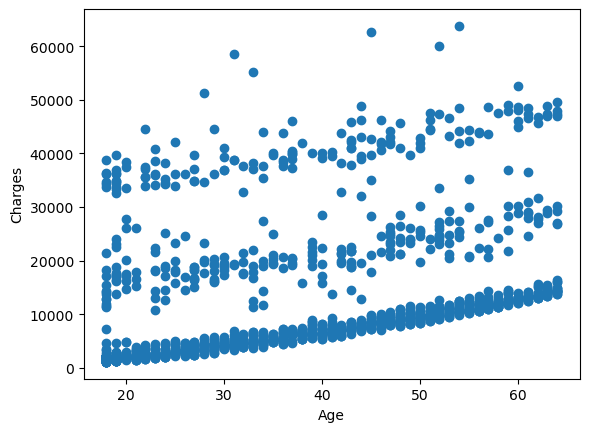

In [4]:
plt.scatter(df['age'],df['charges'])
plt.xlabel("Age")
plt.ylabel("Charges")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [7]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [8]:
## divvide our dataset into independent and dependent features
X=df[['age']] ## indnependent feature
y=df['charges'] ##dependent features

In [9]:
X.shape,y.shape

((1338, 1), (1338,))

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test =train_test_split(X,y,test_size=0.20,random_state=42)

In [12]:
X_train.shape,X_test.shape

((1070, 1), (268, 1))

In [13]:
y_train.shape,y_test.shape

((1070,), (268,))

In [14]:
from sklearn.preprocessing import StandardScaler

In [15]:
scaler=StandardScaler()

In [16]:
X_train=scaler.fit_transform(X_train)

In [17]:
X_test=scaler.transform(X_test)

In [18]:
X_test

array([[ 0.40114007],
       [-0.23863782],
       [ 1.75178229],
       [ 0.47222651],
       [-1.44710717],
       [-0.38081068],
       [-1.44710717],
       [ 1.75178229],
       [-0.80732928],
       [ 0.6854858 ],
       [-0.66515641],
       [ 0.11679434],
       [-0.73624285],
       [ 0.47222651],
       [ 1.46743656],
       [ 0.54331294],
       [ 0.6854858 ],
       [ 0.54331294],
       [ 0.47222651],
       [ 0.25896721],
       [-1.02058858],
       [ 0.25896721],
       [-1.44710717],
       [-1.23384787],
       [ 0.75657224],
       [ 1.04091797],
       [ 1.46743656],
       [-0.87841571],
       [ 0.54331294],
       [-1.5181936 ],
       [ 0.04570791],
       [ 1.25417726],
       [-1.30493431],
       [-0.66515641],
       [-0.94950214],
       [ 0.40114007],
       [-1.30493431],
       [ 0.25896721],
       [ 0.8987451 ],
       [-0.23863782],
       [-1.44710717],
       [-1.23384787],
       [ 1.18309083],
       [ 1.39635013],
       [-0.45189712],
       [ 1

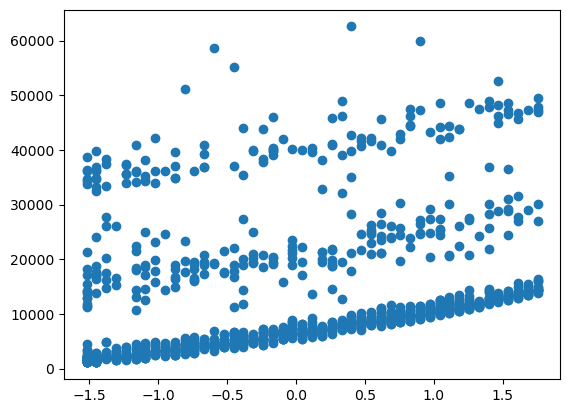

In [19]:
plt.scatter(X_train,y_train)

In [20]:
scaler.transform([[80]])

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[2.88916521]])

In [21]:
## Model Training
from sklearn.linear_model import LinearRegression

In [22]:
regressor=LinearRegression()

In [23]:
## Training the train data
regressor.fit(X_train,y_train)

LinearRegression()

In [24]:
print("Intercept Bo): ",regressor.intercept_)

Intercept Bo):  13346.089736364485


In [25]:
print("Coefficient : ",regressor.coef_)

Coefficient :  [3384.56371086]


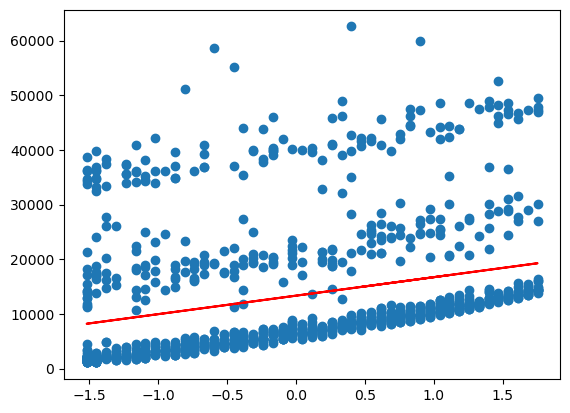

In [26]:
plt.scatter(X_train,y_train)
plt.plot(X_train,regressor.predict(X_train),'r')

### prediction of train data
1. predicted Charges output= intercept +coef_(age)
2. y_pred_train = 13346.089 + 3384.563(X_train)

### prediction of test data
1. predicted Charges output= intercept +coef_(age)
2. y_pred_test = 13346.089 + 3384.563(X_test)


In [27]:
## Prediction for test data
y_pred_test=regressor.predict(X_test)

In [28]:
y_pred_test

array([14703.77387469, 12538.40483659, 19275.10851067, 14944.37043448,
        8448.26332018, 12057.21171701,  8448.26332018, 19275.10851067,
       10613.63235828, 15666.16011384, 11094.82547785, 13741.38763553,
       10854.22891807, 14944.37043448, 18312.72227152, 15184.96699426,
       15666.16011384, 15184.96699426, 14944.37043448, 14222.58075511,
        9891.84267891, 14222.58075511,  8448.26332018,  9170.05299954,
       15906.75667363, 16869.14291279, 18312.72227152, 10373.03579849,
       15184.96699426,  8207.66676039, 13500.79107574, 17590.93259215,
        8929.45643976, 11094.82547785, 10132.4392387 , 14703.77387469,
        8929.45643976, 14222.58075511, 16387.94979321, 12538.40483659,
        8448.26332018,  9170.05299954, 17350.33603236, 18072.12571173,
       11816.61515722, 18072.12571173,  8929.45643976,  9891.84267891,
       14222.58075511, 11335.42203764, 19034.51195088,  8207.66676039,
       13500.79107574,  8207.66676039, 17350.33603236, 15906.75667363,
      

In [29]:
y_test

764      9095.06825
887      5272.17580
890     29330.98315
1293     9301.89355
259     33750.29180
           ...     
109     47055.53210
575     12222.89830
535      6067.12675
543     63770.42801
846      9872.70100
Name: charges, Length: 268, dtype: float64

In [32]:
scaler

StandardScaler()

In [33]:
regressor

LinearRegression()